# Import modules

In [551]:
import pandas as pd #load the data set
import numpy as np #do operations with arrays and matrices
import seaborn as sns # visualize the data set
import matplotlib.pyplot as plt
import warnings #remove unnecessary warnings from dataset 
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
warnings.filterwarnings('ignore')

# loading the dataset

In [552]:
df = pd.read_csv('Train.csv')
dt = pd.read_csv("Test.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [553]:
df.describe() #describe data statictically

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [554]:
df.info() 
#information about Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [555]:
df.apply(lambda x : len(x.unique()))
#check unique values in dataset

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Preprocessing the Dataset

In [556]:
#check for null value in dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [557]:
#check for categerical attribute
categorical_column =[]
for x in df.dtypes.index:
    if df.dtypes[x] == "object":
        categorical_column.append(x)
categorical_column

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [558]:
categorical_column.remove('Item_Identifier')
categorical_column.remove('Outlet_Identifier')
categorical_column

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [559]:
#categorical columns and there associated counts
for col in categorical_column:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [560]:
#filling the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index ="Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [561]:
item_weight_mean = dt.pivot_table(values = "Item_Weight", index ="Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [562]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [563]:
missed_bool = dt['Item_Weight'].isnull()
missed_bool

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [564]:
for i,item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df["Item_Weight"][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [565]:
for i,item in enumerate(dt['Item_Identifier']):
    if missed_bool[i]:
        if item in item_weight_mean:
            dt["Item_Weight"][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [566]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [567]:
dt.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [568]:
#go to doc of pivot table 
outlet_size_mode = df.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [569]:
#go to doc of pivot table 
dt_outlet_size_mode = dt.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", aggfunc=(lambda x:x.mode()[0]))
dt_outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [570]:
#filling missing value of OutLet_Size with mode 
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
df['Outlet_Size'].isnull().sum()

0

In [571]:
missed_bool = dt['Outlet_Size'].isnull()
dt.loc[missed_bool, 'Outlet_Size'] = dt.loc[missed_bool, 'Outlet_Type'].apply(lambda x: dt_outlet_size_mode[x])
dt['Outlet_Size'].isnull().sum()

0

In [572]:
#check item visibily with 0 value
sum(df['Item_Visibility']==0)

526

In [573]:
sum(dt['Item_Visibility']==0)

353

In [574]:
#replacing 0 value with mean value of Item_Visibility
df.loc[:, 'Item_Visibility'].replace([0],[df["Item_Visibility"].mean()],inplace=True)
sum(df["Item_Visibility"]==0)

0

In [575]:
#replacing 0 value with mean value of Item_Visibility
dt.loc[:, 'Item_Visibility'].replace([0],[dt["Item_Visibility"].mean()],inplace=True)
sum(dt["Item_Visibility"]==0)

0

In [576]:
# combine item fat content 
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF":"Low Fat", "reg":"Regular","low fat":"Low Fat"})
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [577]:
# combine item fat content 
dt["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF":"Low Fat", "reg":"Regular","low fat":"Low Fat"})
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Creation of New Attributes

In [578]:
df["New_Item_Type"] = df["Item_Identifier"].apply(lambda x:x[:2])
df["New_Item_Type"]

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [579]:
dt["New_Item_Type"] = dt["Item_Identifier"].apply(lambda x:x[:2])
dt["New_Item_Type"]

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [580]:
df["New_Item_Type"] = df["New_Item_Type"].map({'FD':'Food', "NC":"Non-Consumable",'DR':"Drinks"})
df["New_Item_Type"].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [581]:
dt["New_Item_Type"] = dt["New_Item_Type"].map({'FD':'Food', "NC":"Non-Consumable",'DR':"Drinks"})
dt["New_Item_Type"].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [582]:
df.loc[df["New_Item_Type"]== "Non-Consumable","Item_Fat_Content"]= "Non-Edible"
df["Item_Fat_Content"].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [583]:
dt.loc[dt["New_Item_Type"]== "Non-Consumable","Item_Fat_Content"]= "Non-Edible"
dt["Item_Fat_Content"].value_counts()

Low Fat       2965
Regular       1629
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [584]:
# New values for establishment Year
df["Outlet_Years"] = 2013 - df["Outlet_Establishment_Year"]
dt["Outlet_Years"] = 2013 - dt["Outlet_Establishment_Year"]

In [585]:
df["Outlet_Years"]

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [586]:
dt["Outlet_Years"]

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int64

In [587]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


## Exploratory Data Analysis

<AxesSubplot: xlabel='Item_Visibility', ylabel='Density'>

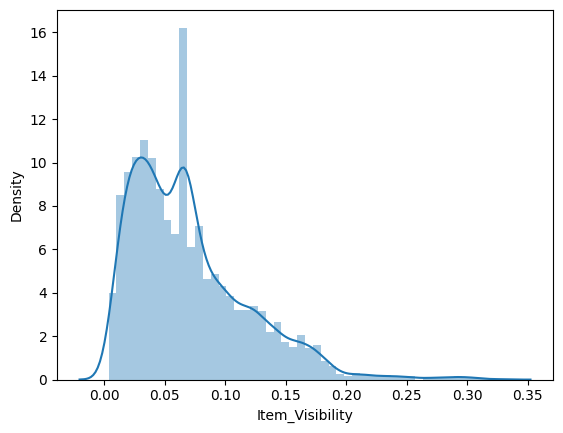

In [588]:
 sns.distplot(df["Item_Visibility"])

<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

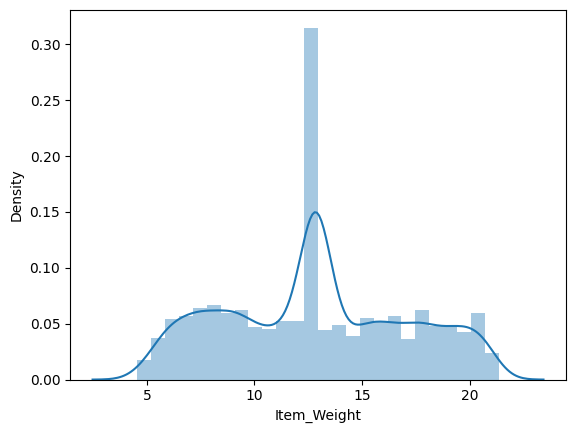

In [589]:
 sns.distplot(df["Item_Weight"])

<AxesSubplot: xlabel='Item_MRP', ylabel='Density'>

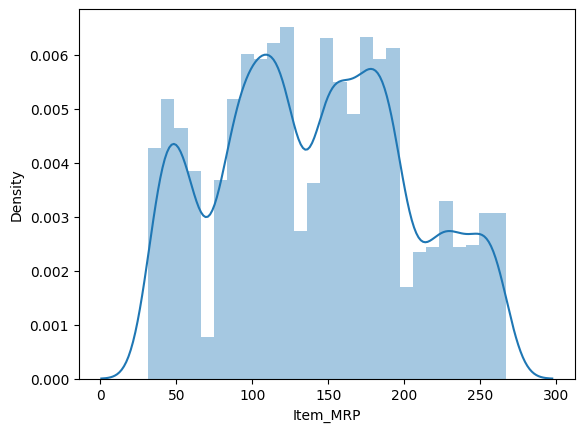

In [590]:
 sns.distplot(df["Item_MRP"])

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

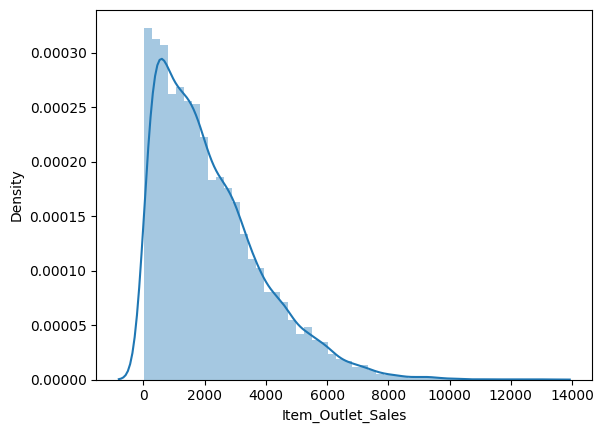

In [591]:
 sns.distplot(df["Item_Outlet_Sales"])

In [592]:
#log Transformation of Item_Outlet_Sales
df["Item_Outlet_Sales"] = np.log(1+ df["Item_Outlet_Sales"])

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

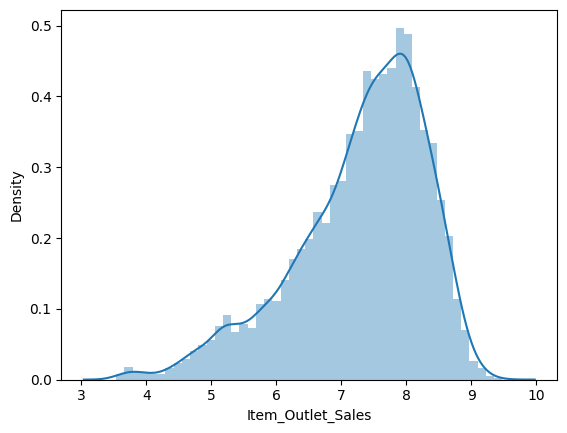

In [593]:
 sns.distplot(df["Item_Outlet_Sales"])

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

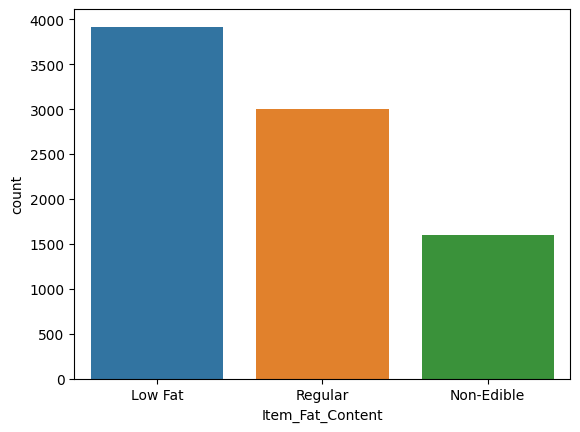

In [594]:
sns.countplot(df["Item_Fat_Content"])

<AxesSubplot: xlabel='Item_Type', ylabel='count'>

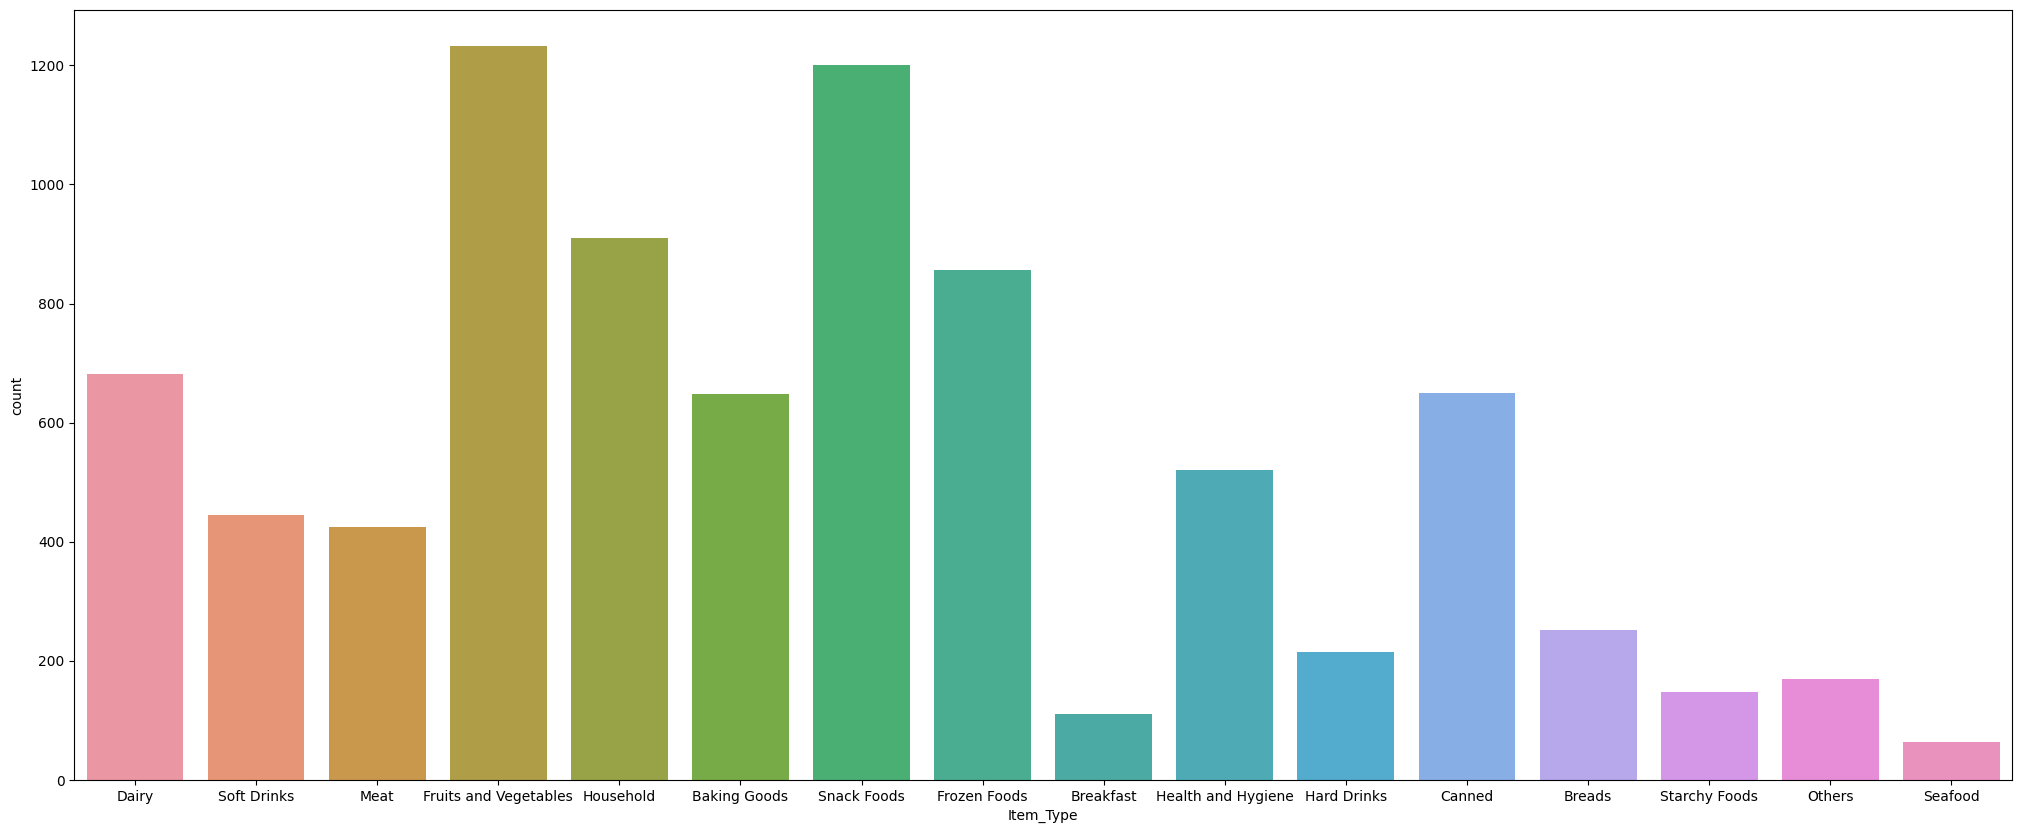

In [595]:
plt.figure(figsize =(25,10))
sns.countplot(df["Item_Type"])

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='count'>

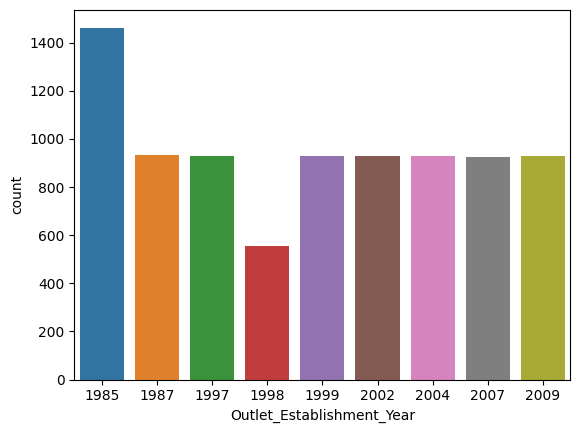

In [596]:
sns.countplot(df["Outlet_Establishment_Year"])

<AxesSubplot: xlabel='Outlet_Size', ylabel='count'>

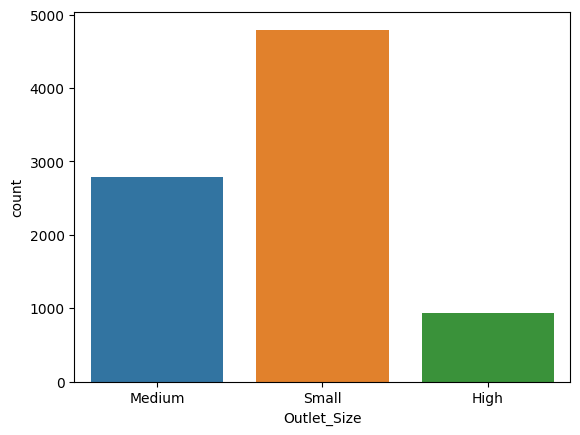

In [597]:
sns.countplot(df["Outlet_Size"])

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='count'>

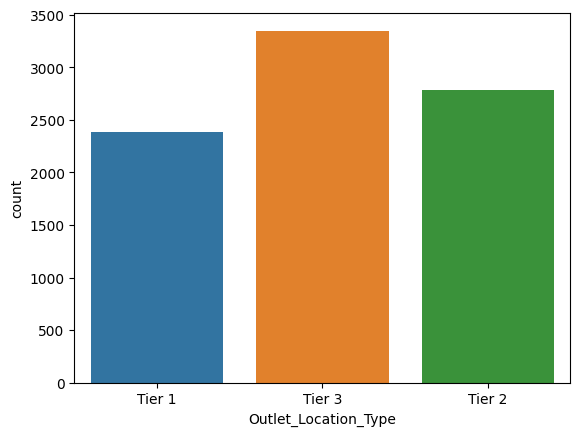

In [598]:
sns.countplot(df["Outlet_Location_Type"])

<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

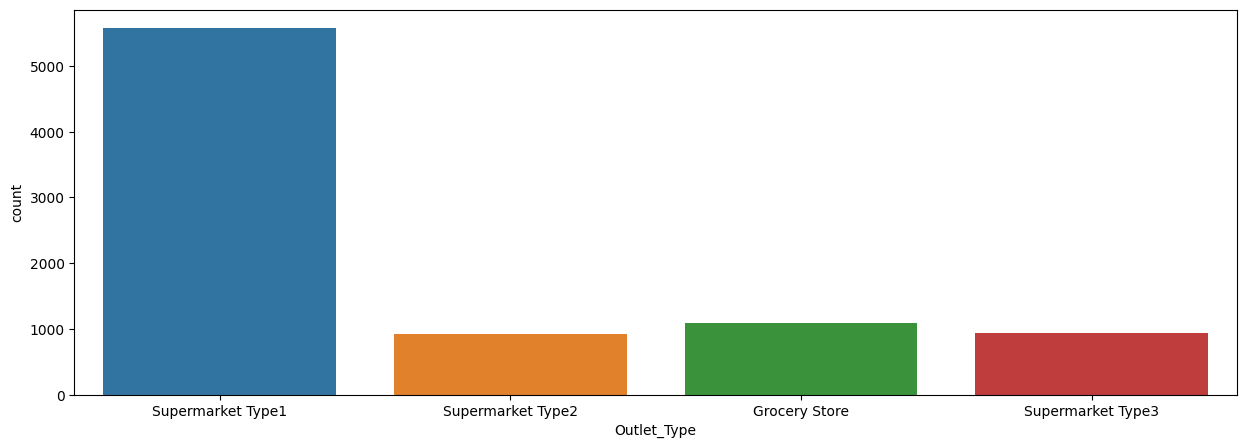

In [599]:
plt.figure(figsize =(15,5))
sns.countplot(df["Outlet_Type"])

# Coorelation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

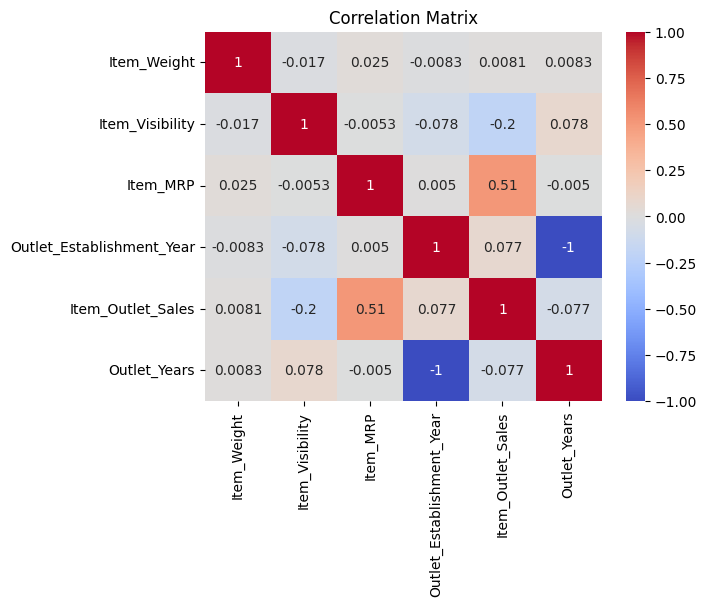

In [600]:
corr = df.corr()
sns.heatmap(corr, annot= True, cmap= "coolwarm")
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Correlation Matrix')

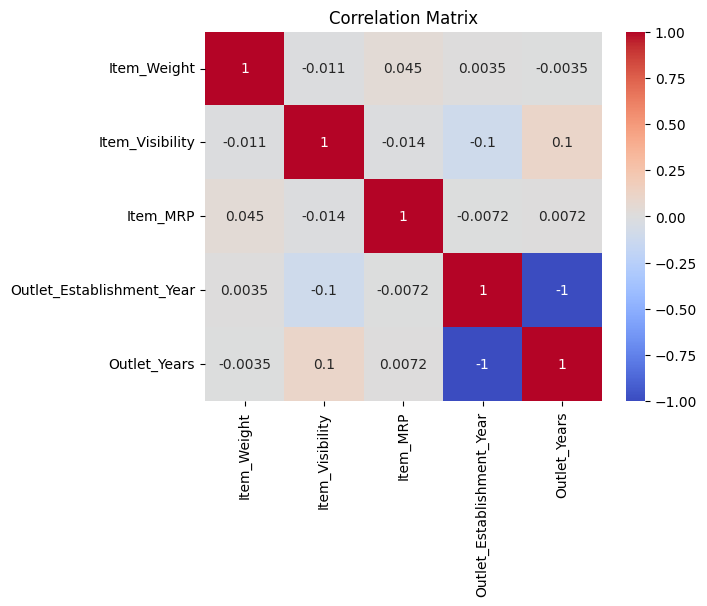

In [601]:
dt_corr = dt.corr()
sns.heatmap(dt_corr, annot= True, cmap= "coolwarm")
plt.title("Correlation Matrix")

In [602]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


# Label Encoding

In [603]:
le = LabelEncoder()
df["Outlet"] = le.fit_transform(df["Outlet_Identifier"])
cat_col =["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type","New_Item_Type"]
for col in cat_col:
    df[col] = le.fit_transform(df[col])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,14,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,15,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,26,1


In [604]:
dt_le = LabelEncoder()
dt["Outlet"] = dt_le.fit_transform(dt["Outlet_Identifier"])
cat_col =["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type","New_Item_Type"]
for col in cat_col:
    dt[col] = dt_le.fit_transform(dt[col])
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,FDW58,20.750000,0,0.007565,13,107.8622,OUT049,1999,1,0,1,1,14,9
1,FDW14,8.300000,2,0.038428,4,87.3198,OUT017,2007,2,1,1,1,6,2
2,NCN55,14.600000,1,0.099575,11,241.7538,OUT010,1998,2,2,0,2,15,0
3,FDQ58,7.315000,2,0.015388,13,155.0340,OUT017,2007,2,1,1,1,6,2
4,FDY38,12.857645,0,0.118599,4,234.2300,OUT027,1985,1,2,3,1,28,5


# Onehot Encoding

In [605]:
df = pd.get_dummies(df, columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","New_Item_Type"])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


In [606]:
dt = pd.get_dummies(dt, columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","New_Item_Type"])
dt.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,14,9,1,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,6,2,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,15,0,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,6,2,0,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.857645,0.118599,4,234.2300,OUT027,1985,28,5,1,...,0,0,1,0,0,0,1,0,1,0


# Train-Test Split

In [607]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Outlet_Establishment_Year","Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"])
y = df["Item_Outlet_Sales"]
# X_test = df.drop(columns=["Outlet_Establishment_Year","Item_Identifier","Outlet_Identifier"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

# Model Training

In [608]:
from sklearn.model_selection import cross_val_score
# from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model_names = ['Decision Tree', 'Random Forest', 'XGBoost']
mse_scores=[]
cv_scores=[]
def train(model, X_train,y_train):
    # train the model
    model.fit(X_train,y_train )
    
    # predict the training set
    pred = model.predict(X_test)
  

    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring="neg_mean_squared_error",cv=5)
    cv_score = np.abs(np.mean(cv_score))
    cv_scores.append(cv_score)
    mse= mean_squared_error(y_test,pred)
    mse_scores.append(mse)
    two_score = r2_score(y_test,pred)
    print("Model Report")
    print("MSE", mse)
    print("CSV Score:", cv_score)
    print("R2 Score:", two_score)


Model Report
MSE 0.5727792459436781
CSV Score: 0.5772972330727087
R2 Score: 0.455193357387637


<AxesSubplot: title={'center': 'Feature Importance'}>

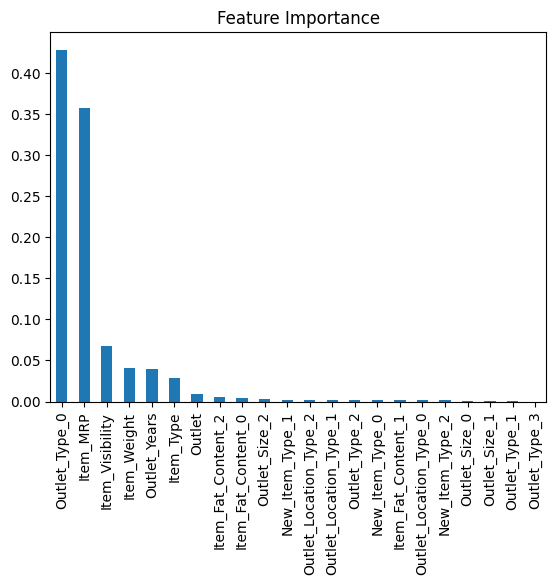

In [609]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE 0.29827114568681956
CSV Score: 0.3094417016840346
R2 Score: 0.7162954094084653


<AxesSubplot: title={'center': 'Feature Importance'}>

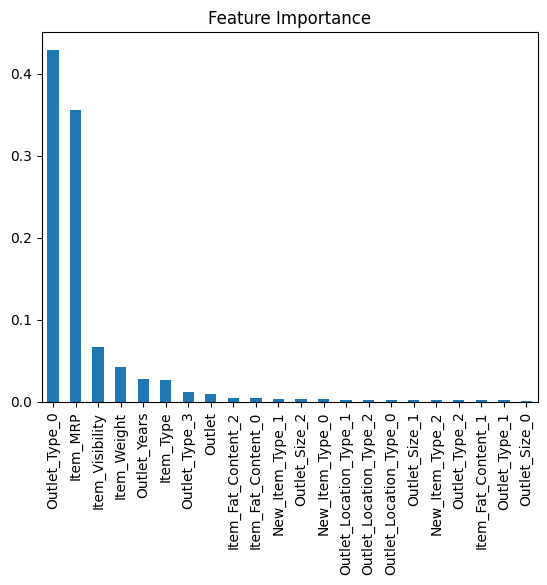

In [610]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE 0.27771687101475134
CSV Score: 0.28418415209418824
R2 Score: 0.7358458827447896


<AxesSubplot: title={'center': 'Feature Importance'}>

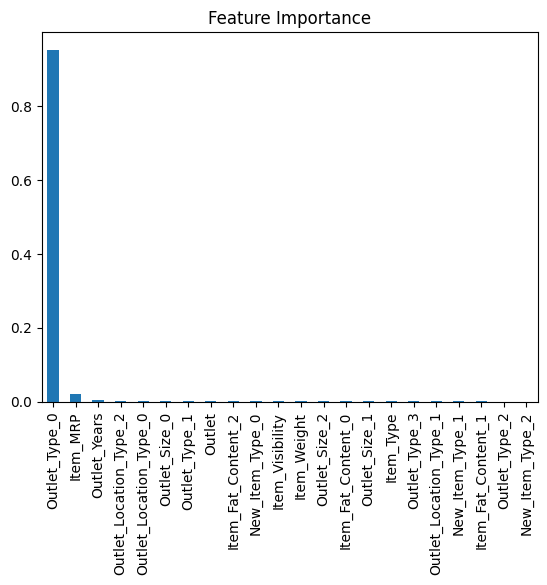

In [611]:
from xgboost import XGBRegressor
model = XGBRegressor(learning_rate=0.1,random_state=42)
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [612]:
print(mse_scores)
print(cv_scores)

[0.5727792459436781, 0.29827114568681956, 0.27771687101475134]
[0.5772972330727087, 0.3094417016840346, 0.28418415209418824]


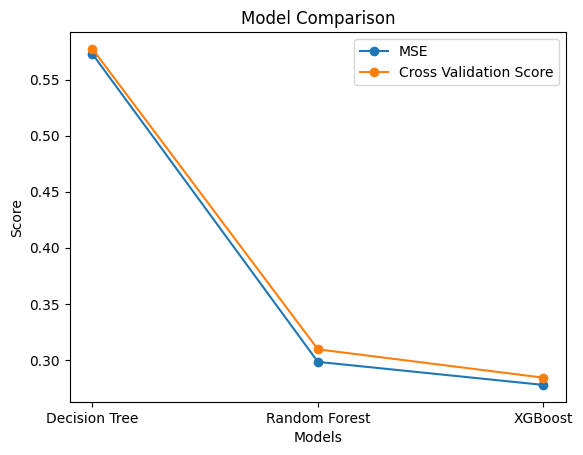

In [613]:
plt.plot(model_names, mse_scores, '-o', label='MSE')
plt.plot(model_names, cv_scores, '-o', label='Cross Validation Score')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()